In [34]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("AQI_HaNoi_Done.csv")
df.head()

,date,pm25,pm10,o3,no2,so2,co,year,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,85.0,32.0,20.0,14.0,12.0,9.0,NaN,153.571429,32.0,6.2500,7.0,4.8,45.0,153.571429
1,2019-01-02,70.0,31.0,15.0,21.0,5.0,4.0,NaN,133.333333,31.0,4.6875,10.5,2.0,20.0,133.333333
2,2019-01-03,33.0,49.0,8.0,10.0,13.0,5.0,NaN,66.000000,49.0,2.5000,5.0,5.2,25.0,66.000000
3,2019-01-04,73.0,50.0,13.0,23.0,7.0,10.0,NaN,138.333333,50.0,4.0625,11.5,2.8,50.0,138.333333
4,2019-01-05,34.0,42.0,22.0,12.0,13.0,10.0,NaN,68.000000,42.0,6.8750,6.0,5.2,50.0,68.000000


In [35]:
train_dates= pd.to_datetime(df['date'])
df = df.drop(columns={'year'})
df

,date,pm25,pm10,o3,no2,so2,co,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,85.0,32.0,20.0,14.0,12.0,9.0,153.571429,32.0,6.2500,7.0,4.8,45.0,153.571429
1,2019-01-02,70.0,31.0,15.0,21.0,5.0,4.0,133.333333,31.0,4.6875,10.5,2.0,20.0,133.333333
2,2019-01-03,33.0,49.0,8.0,10.0,13.0,5.0,66.000000,49.0,2.5000,5.0,5.2,25.0,66.000000
3,2019-01-04,73.0,50.0,13.0,23.0,7.0,10.0,138.333333,50.0,4.0625,11.5,2.8,50.0,138.333333
4,2019-01-05,34.0,42.0,22.0,12.0,13.0,10.0,68.000000,42.0,6.8750,6.0,5.2,50.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1882,2024-02-26,62.0,26.0,6.0,3.0,8.0,4.0,120.000000,26.0,1.8750,1.5,3.2,20.0,120.000000
1883,2024-02-27,47.0,43.0,5.0,3.0,8.0,6.0,94.000000,43.0,1.5625,1.5,3.2,30.0,94.000000
1884,2024-02-28,86.0,29.0,9.0,2.0,8.0,4.0,154.285714,29.0,2.8125,1.0,3.2,20.0,154.285714
1885,2024-02-29,55.0,27.0,11.0,3.0,8.0,5.0,108.333333,27.0,3.4375,1.5,3.2,25.0,108.333333


In [36]:
cols = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI']
df = df[cols]
df.head()

,date,pm25,pm10,o3,no2,so2,co,AQI
0,2019-01-01,85.0,32.0,20.0,14.0,12.0,9.0,153.571429
1,2019-01-02,70.0,31.0,15.0,21.0,5.0,4.0,133.333333
2,2019-01-03,33.0,49.0,8.0,10.0,13.0,5.0,66.000000
3,2019-01-04,73.0,50.0,13.0,23.0,7.0,10.0,138.333333
4,2019-01-05,34.0,42.0,22.0,12.0,13.0,10.0,68.000000


In [57]:
# Chia train, test
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]
X_train = train_data.drop(['date', 'AQI'], axis=1)
y_train = train_data['AQI']

X_test = test_data.drop(['date', 'AQI'], axis=1)
y_test = test_data['AQI']

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [59]:
y_pred

array([ 73.86535077,  55.37150174,  50.60895124,  56.94163927,
        58.3734116 ,  61.81736478,  61.22271442,  49.71950501,
        44.75678561,  44.28115948,  60.58064308,  75.6705727 ,
        75.7930791 ,  44.81806155,  50.41311018,  50.77860648,
        50.16140511,  57.58538002,  63.58883683,  73.4019913 ,
        66.67977524,  75.57916762,  69.55546468,  59.60810799,
        82.54473649, 100.70373675,  73.14661769,  66.97941958,
        81.72569679,  75.27461988,  75.75709127,  96.19291517,
       112.89287817,  86.33955091,  78.32576915,  84.3464244 ,
       107.18139197,  75.85934756,  87.15978953,  81.0361312 ,
        76.72248512,  74.59156995,  79.93454248,  84.20255638,
        86.26662463, 108.05467645, 112.46030714,  85.0357878 ,
        66.91622189,  64.51432431,  56.6132997 ,  76.2667119 ,
        84.58725044,  81.49995894,  85.94655018,  81.20619714,
        73.90939793,  69.47909999,  52.47552416, 107.30654238,
        94.498335  ,  97.1154635 , 121.40073868, 100.77

In [60]:
days_pred= 30
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
_30_next_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
_30_next_days_index

RangeIndex(start=1886, stop=1916, step=1)

In [61]:
pred_30_days = model.predict(X_test[-days_pred:])
pred_30_days

array([252.86937652, 216.82188444, 109.72094319, 104.38662294,
       113.39365421, 129.7905028 , 126.49489733, 104.19885206,
       112.75460421, 213.95317769, 146.55664338, 174.22315419,
       108.60829236, 104.38796539, 135.16811232, 181.95089675,
       142.59615133, 115.29204384, 100.51059318, 124.8452225 ,
       129.32115244, 118.36332616, 150.80854285,  74.40027466,
        75.00506614, 106.29995968,  87.43119249, 138.5291555 ,
        98.24437199,  87.21844645])

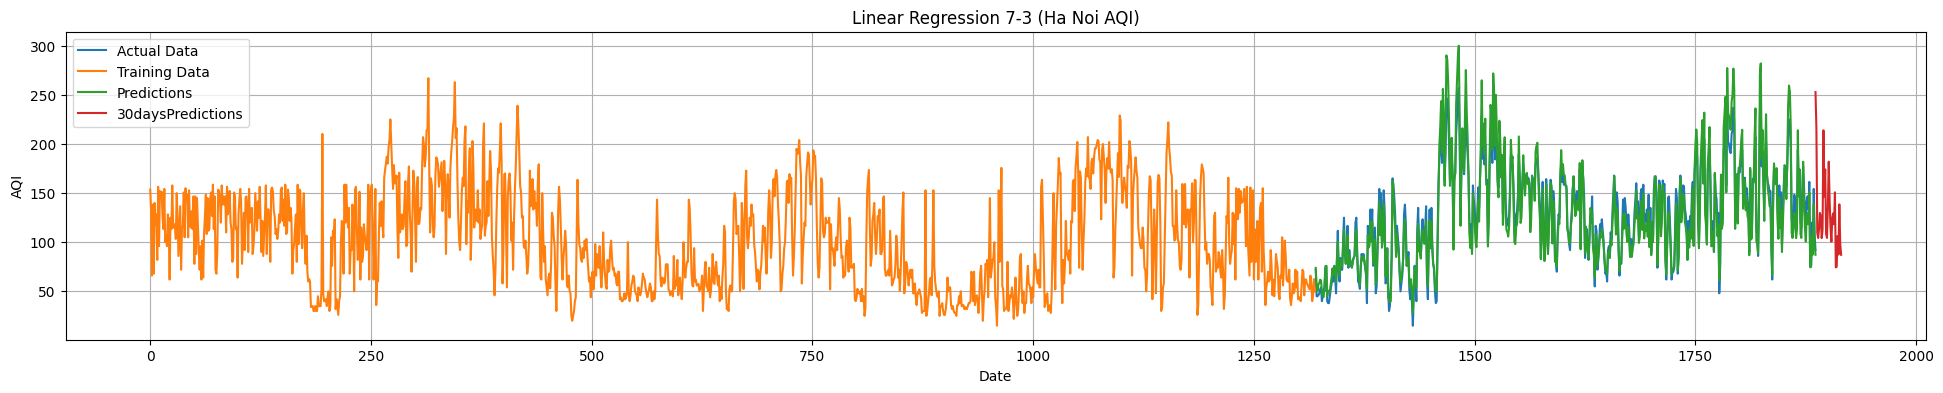

In [62]:
plt.figure(figsize=(24, 4))
plt.plot(test_data.index, test_data['AQI'], label='Actual Data')
plt.plot(train_data.index, train_data['AQI'], label='Training Data')
plt.plot(test_data.index, y_pred, label='Predictions')
plt.plot(_30_next_days_index, pred_30_days, label='30daysPredictions')
plt.title('Linear Regression 7-3 (Ha Noi AQI)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 8.13%
MAE: 10.26
RMSE: 13.15
